In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trans = pd.read_csv('Book1.csv', index_col='dates')
trans

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id
dates,,,,,,
1/1/2020,Monday,50000,Naira,3,Evening,1
1/3/2020,Wednesday,20000,Naira,2,Morning,1
1/10/2020,Wednesday,80000,Naira,6,Evening,1
1/15/2020,Monday,40000,Naira,3,Afternoon,1
1/16/2020,Tuesday,32000,Naira,2,Afternoon,1
1/18/2020,Thursday,10000,Naira,1,Morning,1
1/22/2020,Monday,60000,Naira,4,Afternoon,1
1/23/2020,Tuesday,55000,Naira,3,Evening,1
1/25/2020,Thursday,70000,Naira,4,Evening,1


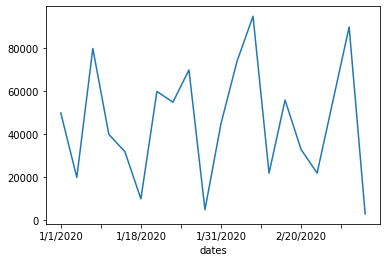

In [3]:
trans['Total Amount'].plot()

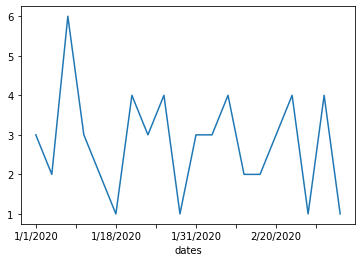

In [4]:
trans['Total Amount of transactions done'].plot()

In [5]:
dates = trans.index.values

In [6]:
year = []
month = []
day = []
for date in dates:
    date = str(date)
    str_date = date.split('/')
    str_date = list(str_date)
    year.append(int("".join(str_date[2]))) 
    month.append(int("".join(str_date[0])))
    day.append(int("".join(str_date[1])))
    

In [7]:
trans['year'] = year
trans['month'] = month
trans['day'] = day

In [8]:
#trans.drop(['period of transaction'], axis = 1, inplace =True)
#trans.drop(['currency'], axis = 1, inplace = True)

In [9]:
trans.head()

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id,year,month,day
dates,,,,,,,,,
1/1/2020,Monday,50000,Naira,3,Evening,1,2020,1,1
1/3/2020,Wednesday,20000,Naira,2,Morning,1,2020,1,3
1/10/2020,Wednesday,80000,Naira,6,Evening,1,2020,1,10
1/15/2020,Monday,40000,Naira,3,Afternoon,1,2020,1,15
1/16/2020,Tuesday,32000,Naira,2,Afternoon,1,2020,1,16


In [10]:
days = { 'Monday': 1 , 'Tuesday': 2 , 'Wednesday': 3 , 'Thursday': 4 , 'Friday':5, 'Saturday': 6 , 'Sunday': 7}
period = { 'Morning': 1 , 'Afternoon': 2 , 'Evening': 3}
currency = { 'Naira': 0}
trans = trans.replace({'Day': days })
trans = trans.replace({'period of transaction': period })
trans = trans.replace({'currency': currency })

In [11]:
#trans.drop(['Day'], axis = 1, inplace =True)

In [12]:
trans.head()

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id,year,month,day
dates,,,,,,,,,
1/1/2020,1,50000,0,3,3,1,2020,1,1
1/3/2020,3,20000,0,2,1,1,2020,1,3
1/10/2020,3,80000,0,6,3,1,2020,1,10
1/15/2020,1,40000,0,3,2,1,2020,1,15
1/16/2020,2,32000,0,2,2,1,2020,1,16


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler(feature_range = (0,1))
scaled_set = sc.fit_transform(trans)

In [14]:
check = len(scaled_set)
check

20

In [15]:
# creating a data structure with 9 timesteps and 1 output
x_train = []
y_train = []

for i in range(9, check):
    x_train.append(scaled_set[i-9:i, :]) 
    y_train.append(scaled_set[i,:])
    
    

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 9))

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [19]:
detector = Sequential()

In [20]:
detector.add(LSTM(units = 35, return_sequences = True, input_shape = (x_train.shape[1], 9)))
detector.add(Dropout(0.2))
detector.add(LSTM(units = 35, return_sequences =True))
detector.add(Dropout(0.2))
detector.add(LSTM(units = 35))
detector.add(Dropout(0.2))
detector.add(Dense(units=9))
detector.compile(optimizer = 'RMSprop', loss = 'mean_squared_error', metrics = ['accuracy'])

In [39]:
detector.fit(x_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
11/11 [==============================] - 0s 34ms/step - loss: 0.0633 - accuracy: 0.2727
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0679 - accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0697 - accuracy: 0.1818
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0673 - accuracy: 0.2727
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0717 - accuracy: 0.2727
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0669 - accuracy: 0.4545
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0643 - accuracy: 0.3636
Epoch 8/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0593 - accuracy: 0.2727
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0709 - accuracy: 0.2727
Epoch 10/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0646 - accuracy: 0.1818
Epoch 11/50
11/11 

In [40]:
test_data = pd.read_csv("Book1.csv", index_col='dates')

In [41]:
dates = test_data.index.values

In [42]:
year = []
month = []
day = []
for date in dates:
    date = str(date)
    str_date = date.split('/')
    str_date = list(str_date)
    year.append(int("".join(str_date[2]))) 
    month.append(int("".join(str_date[0])))
    day.append(int("".join(str_date[1])))
    

In [43]:
test_data['year'] = year
test_data['month'] = month
test_data['day'] = day

In [44]:
#test_data.drop(['period of transaction'], axis = 1, inplace =True)
#test_data.drop(['currency'], axis = 1, inplace = True)
#test_data.drop(['Day'], axis = 1, inplace =True)

In [45]:
test_data = test_data.replace({'Day': days })
test_data = test_data.replace({'period of transaction': period })
test_data = test_data.replace({'currency': currency })

In [46]:
data_total = pd.concat((trans, test_data), axis = 0)

In [47]:
inputs = data_total[len(data_total) - len(test_data) - 9 :].values  

In [48]:
inputs

array([[    4, 74000,     0,     3,     2,     1,  2020,     2,     1],
       [    2, 95000,     0,     4,     1,     1,  2020,     2,     6],
       [    1, 22000,     0,     2,     3,     1,  2020,     2,    12],
       [    3, 56000,     0,     2,     1,     1,  2020,     2,    14],
       [    2, 33000,     0,     3,     2,     1,  2020,     2,    20],
       [    3, 22000,     0,     4,     1,     1,  2020,     2,    21],
       [    1, 56000,     0,     1,     3,     1,  2020,     2,    26],
       [    3, 90000,     0,     4,     2,     1,  2020,     2,    28],
       [    4,  3000,     0,     1,     1,     1,  2020,     3,     1],
       [    1, 50000,     0,     3,     3,     1,  2020,     1,     1],
       [    3, 20000,     0,     2,     1,     1,  2020,     1,     3],
       [    3, 80000,     0,     6,     3,     1,  2020,     1,    10],
       [    1, 40000,     0,     3,     2,     1,  2020,     1,    15],
       [    2, 32000,     0,     2,     2,     1,  2020,     1, 

In [49]:
inputs = sc.transform(inputs)

In [50]:
x_test = []
for i in range(9, 29):
    x_test.append(inputs[i-9:i,: ]) 
    
x_test= np.array(x_test)

In [51]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 9))

In [52]:
predicted_values = detector.predict(x_test)
predicted_values = sc.inverse_transform(predicted_values)

In [53]:
pred_df = pd.DataFrame(predicted_values, columns= test_data.columns)

In [54]:
pred_df = pred_df.round()
pred_df

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id,year,month,day
0,3.0,16258.0,0.0,1.0,1.0,1.0,2020.0,2.0,17.0
1,3.0,31306.0,0.0,2.0,2.0,1.0,2020.0,2.0,16.0
2,3.0,39266.0,0.0,2.0,2.0,1.0,2020.0,2.0,15.0
3,3.0,37065.0,0.0,2.0,2.0,1.0,2020.0,2.0,16.0
4,3.0,38841.0,0.0,2.0,2.0,1.0,2020.0,2.0,17.0
5,3.0,34009.0,0.0,2.0,2.0,1.0,2020.0,2.0,18.0
6,3.0,29970.0,0.0,2.0,1.0,1.0,2020.0,2.0,19.0
7,3.0,18906.0,0.0,1.0,1.0,1.0,2020.0,2.0,20.0
8,3.0,14772.0,0.0,1.0,1.0,1.0,2020.0,1.0,20.0
9,2.0,23199.0,0.0,1.0,1.0,1.0,2020.0,1.0,19.0


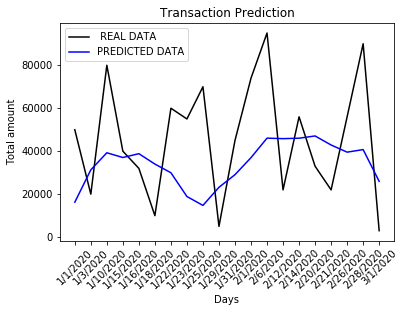

In [55]:
plt.plot(test_data['Total Amount'], color = 'black', label = ' REAL DATA')
plt.plot(pred_df['Total Amount'], color = 'blue', label= 'PREDICTED DATA')
plt.title('Transaction Prediction')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.ylabel('Total amount')
plt.legend()
plt.show()